# Predicting Handwritten Digits using KNN
Raphael E. Gutierrez • August 30, 2021

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The dataset contains 420,000 instances of 785-featured data but 10,000 are only used for faster modelling. Each instance is row of flattened 28x28 pixels integer values, with additional one column for the label. Since K-Nearest Neighbors is used in this notebook, the train.csv will be the dataset as it contains labels or targets.

## Preliminaries
This section imports all the necessary packages and the dataset.

In [1]:
# Packages for array and DataFrame processing
import numpy as np
import pandas as pd

# Packages for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn package for the dataset and model
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv("train.csv").iloc[:10000]  # 10k data only due to hardware limitations

data.head()
# 28*28 9pixels + 1 (label) = 785 cols

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(10000, 785)

## Exploratory Data Analysis
This section explores the dataset, its structure and features, checks for NaN/Null values, and shows class distribution.

In [4]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.00000,10000.000000,10000.000000,10000.0000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.445600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.15130,0.107800,0.042200,0.0177,0.0022,0.0,0.0,0.0,0.0,0.0
std,2.885598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.37828,4.515176,2.849462,1.7700,0.2200,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.00000,253.000000,252.000000,177.0000,22.0000,0.0,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 59.9 MB


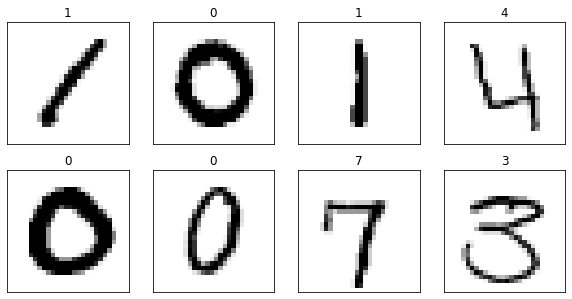

In [6]:
# Plots the first eight data (each data is consists of 28x28 np.array)

fig, axes = plt.subplots(2, 4, figsize=(10,5))

indices = [[0,0], [0,1], [0,2], [0,3],
           [1,0], [1,1], [1,2], [1,3]]
x = 0

for i,j in indices:
    axes[i][j].imshow(np.array(data.iloc[x, 1:]).reshape(28,28), interpolation="nearest", cmap="gray_r")
    axes[i][j].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
    axes[i][j].set_title(data.iloc[x, 0])
    x += 1

In [7]:
print("NaN/Null values:", data.isnull().any().sum())

NaN/Null values: 0


In [8]:
print("Class distribution:")
data["label"].value_counts()

Class distribution:


1    1095
2    1045
7    1039
3    1009
6    1003
9     995
0     991
4     967
8     950
5     906
Name: label, dtype: int64

Text(0.5, 1.0, 'Class Distribution')

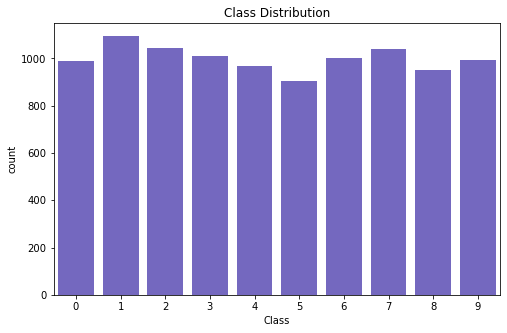

In [9]:
plt.figure(figsize=(8,5))

sns.countplot(x=data["label"], color="slateblue")
plt.xlabel("Class")
plt.title("Class Distribution")

## Tuning Hyperparameters with Cross-Validation
Tuning hyperparameters (in this case, the number of neighbors) using grid search method and cross-validation.

In [10]:
X = data.drop("label", axis=1)
y = data["label"]

# Divide data into trainval (whole train set) and testing set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# divide trainval (whole train set) into train for model fit and valid set for model validation all in grid search
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)

print("Size of trainval (whole training set):", X_trainval.shape[0])
print("Size of testing (whole testing set):", X_test.shape[0])
print("Size of train set to be used in CV:", X_train.shape[0])
print("Size of valid set to validate model in CV:", X_valid.shape[0])

Size of trainval (whole training set): 7500
Size of testing (whole testing set): 2500
Size of train set to be used in CV: 5625
Size of valid set to validate model in CV: 1875


In [14]:
n_neighbors = [i for i in range(1,20)]  # neighbors to be tested
score_list = []
best_score = 0

for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    scores = cross_val_score(knn, X_valid, y_valid, cv=5)
    score = scores.mean()
    score_list.append(score)
    
    if score > best_score:
        best_score = score
        best_params = {"n_neighbors": n}
        

print("Best validation score: %.2f" % best_score)
print("Best parameters:", best_params)

Best validation score: 0.90
Best parameters: {'n_neighbors': 1}


Text(0.5, 1.0, 'Error Rate vs. K Value')

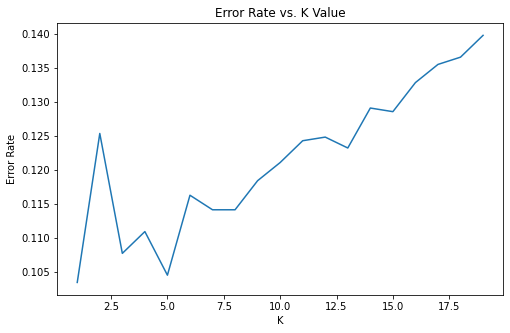

In [16]:
errors = [1.00-i for i in score_list]

plt.figure(figsize=(8,5))
plt.plot(n_neighbors, errors)
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. K Value")

## Model Fitting & Evaluation
Fits and evaluates the dataset into the model using the best parameters cross-validated above.

In [23]:
knn = KNeighborsClassifier(**best_params)
knn.fit(X_trainval, y_trainval)

print("Mean accuracy score: %.2f" % knn.score(X_test, y_test))

Mean accuracy score: 0.95


Text(0.5, 1.0, 'Confusion Matrix')

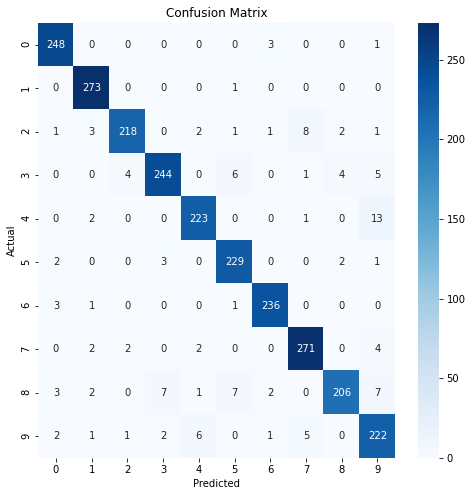

In [24]:
y_pred = knn.predict(X_test)

cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(cf, vmin=0, annot=True, fmt="g", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [25]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       252
           1       0.96      1.00      0.98       274
           2       0.97      0.92      0.94       237
           3       0.95      0.92      0.94       264
           4       0.95      0.93      0.94       239
           5       0.93      0.97      0.95       237
           6       0.97      0.98      0.98       241
           7       0.95      0.96      0.96       281
           8       0.96      0.88      0.92       235
           9       0.87      0.93      0.90       240

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500



## Alternative Method using GridSearchCV
This section uses GridSearchCV from scikit-learn package to apply grid search and cross-validation. Note that in all methods, the cv value can be a KFold or StratifiedKFold object, or just an int of folds.

In [350]:
from sklearn.model_selection import GridSearchCV

X = data.drop("label", axis=1)
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

param_grid = {"n_neighbors": [i for i in range(1,10)]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: %.2f" % grid_search.score(X_test, y_test))
print("Best cross-validation score: %.2f" % grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)

Test set score: 0.95
Best cross-validation score: 0.94
Best parameters: {'n_neighbors': 1}
Best estimator: KNeighborsClassifier(n_neighbors=1)


In [351]:
knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train, y_train)

print("Mean accuracy score: %.2f" % knn.score(X_test, y_test))

y_pred = knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Mean accuracy score: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       252
           1       0.96      1.00      0.98       274
           2       0.97      0.92      0.94       237
           3       0.95      0.92      0.94       264
           4       0.95      0.93      0.94       239
           5       0.93      0.97      0.95       237
           6       0.97      0.98      0.98       241
           7       0.95      0.96      0.96       281
           8       0.96      0.88      0.92       235
           9       0.87      0.93      0.90       240

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500



## Predicting unseen data

#### Imports data to np.array format, resizes to 28x28 pixels, coverts to greyscale, then exports

In [147]:
from PIL import Image

raw_img = Image.open("2.png")

img = raw_img.resize((28, 28))  # resize to 28x28 pixels (can be higher if model is fitted into higher pixels)
img = img.convert('L')  # greyscale to become RGB 28,28 format (previously RGBA 28,28,4)

arr_img = np.array(img)

arr_img.shape

(28, 28)

#### Preliminary Prediction

Preliminary prediction: [2]


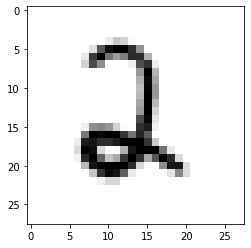

In [148]:
plt.imshow(arr_img, cmap="gray_r")

print("Preliminary prediction:", knn.predict(arr_img.ravel().reshape(1,-1)))

#### Scaling/normalizing the data before prediction

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((0,1000))
scaled = scaler.fit_transform(arr_img)

# scaled

#### Scaled Prediction

Scaled prediction: [2]


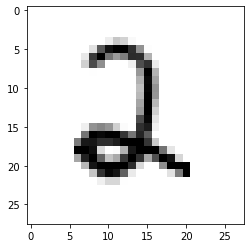

In [150]:
plt.imshow(scaled.reshape(28,28), cmap="gray_r")

print("Scaled prediction:", knn.predict(scaled.ravel().reshape(1,-1)))

## Conclusion

With a 0.95 mean accuracy score in both manual grid search and using sklearn's GridSearchCV methods, the models can able to predict the unseen data with 95% confidence. By looking at the confusion matrix, we can say that the model did a pretty good prediction with minimal errors. Meanwhile, the f-1 scores of the features show a range of 90-98% scores which indicates that the KNN model used with parameters tuned using grid search did perform very well.


References: 

http://yann.lecun.com/exdb/mnist/

https://www.kaggle.com/c/digit-recognizer/data